# Exercise 1
The Pott's model is a generalization of the Ising model which was originally intended for models of two states of spin in a given lattice of "d" dimension. The Ising model was first used to study the theory of ferromagnetism. The Pott's model like the Ising model is used to find critical points in a system making the two-dimensional Pott's model more appealing because you can find the critical points mathematically. 

However, once you go into 3-4 dimensions you can only solve these numerically and with computers. The most relevant equations I have found for this model are as follows:

$$\Theta_n=(2*\pi*n)/q$$ ; The Hamiltonian interaction between neighbors $$H=-J(\theta_{ij})$$ where $$\theta_{ij}$$ is the angle between two neighboring vectors written as $$J(\theta{ij})=-\epsilon_1cos\theta$$

This leads us to finding the critical point for all q written as $$J(\theta{ij})=-\epsilon_2\delta_{K,r}(n_i,n_j)$$

# Exercise 2
### Part (i)
The equations of motion for the position $x$, $y$ of a planet in its orbital plane are
<br><br>$$\frac{d^2x}{dt^2}= −GM \frac{x}{r^3}, \\   \frac{d^2y}{dt^2}= −GM \frac{y}{r^3},$$<br>
where $G = 6.6738×10^{-11} m^3 kg^{−1}s^{−2}$ is Newton’s gravitational constant, $M = 1.9891×10^{30} kg$
is the mass of the Sun, and $r =\sqrt{x^2 + y^2}$ which is the distance between two points.
<br><br>
Now we transform this system of two second order ODEs into an equivalent system of four first order ODEs.
<br><br>
$$\frac{dx}{dt}= v_x(t), \ \ \frac{dy}{dt}= v_y(t),$$
$$\frac{dv_x}{dt}= −GM \frac{x}{r^3}, \ \ \frac{dv_y}{dt}= −GM \frac{y}{r^3},$$

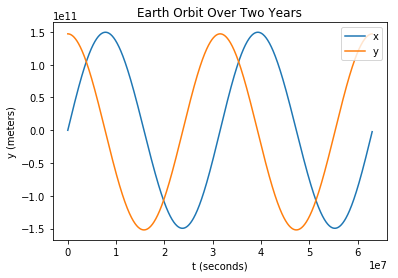

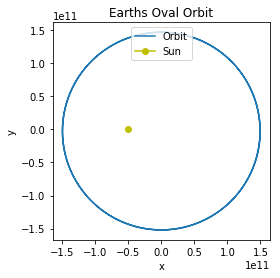

In [2]:
#Kaleb Kautzsch
#Part (ii)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import G

#Important constants
mSun = 1.9891e30 #In kg
con = -G*mSun #Constants G and mass of the Sun multiplied

#Function in terms of r and t changed into vectors and 2 second order ODE's into 4 first order ODE's
def f(r,t):
    x = r[0]
    y = r[1]
    radius = (x**2 + y**2)**(3/2)
    v_x = r[2] #Setting up derivatives in vectors
    v_y = r[3] #for x and y
    dx = v_x
    dy = v_y
    dv_x = con*x/radius
    dv_y = con*y/radius
    return np.array([dx,dy,dv_x,dv_y], float)

#Numerical parameters
s = 31536000 #Seconds in a year
start = 0
end = 2*s #Two years
N = 1000
stepSize = (end-start)/N

#Solution Vectors
tpoints = np.arange(start,end,stepSize)
xpoints = []
ypoints = []

#Initial Conditions
periDis = 1.4710e11 #Perihelion Distance in meters
periVel = 3.0287e4 #Perihelion Velocity in inverse ms
r = np.array([0,periDis,periVel,0], float)

#Use Runge-Kutta
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = stepSize*f(r,t)        
    k2 = stepSize*f(r+0.5*k1,t+0.5*stepSize)   
    k3 = stepSize*f(r+0.5*k2,t+0.5*stepSize)
    k4 = stepSize*f(r+k3,t+stepSize)
    r += (k1+2.*k2+2.*k3+k4)/6

#PLot Orbits
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.title("Earth Orbit Over Two Years")
plt.xlabel("t (seconds)")
plt.ylabel('y (meters)')
plt.legend(loc='upper right')
plt.show()

#Plot Oval Orbit
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(xpoints,ypoints, label='Orbit')
plt.plot(-0.5e11,0,marker='o',color='y', label='Sun')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Earths Oval Orbit')
plt.legend(loc='upper center')
plt.show()

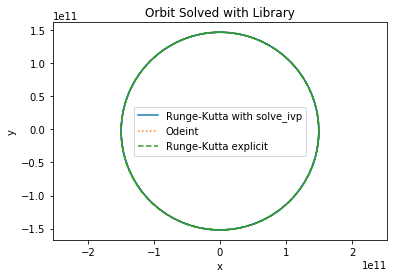

In [3]:
#Part(iii)
from scipy.integrate import solve_ivp, odeint

#Switch the order to avoid error
def fLib(t, r):
    return f(r, t)

#Initial Conditions
initial = [0.0,periDis,periVel,0.0] 

#Libraries solving 
solve = solve_ivp(fLib, (start, end), initial, method='RK45', rtol = 1e-8)
solve2 = odeint(f, initial, tpoints)

#Plot Orbits
plt.plot(solve.y[0], solve.y[1], label='Runge-Kutta with solve_ivp')
plt.plot(solve2[:,0], solve2[:,1], ':', label = 'Odeint')
plt.plot(xpoints, ypoints, '--', label='Runge-Kutta explicit')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Orbit Solved with Library')
plt.legend()
plt.gca().set_aspect('equal', 'datalim')
plt.show()

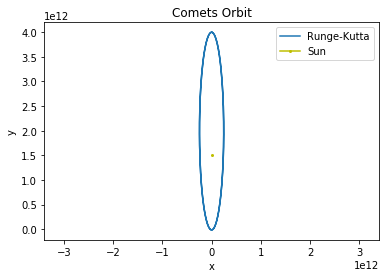

In [4]:
#Part (iv)
#Comet variables
comDis = 4e12 #In meters
comVel = 500 #In inverse ms
end = 100*s #Time is longer for a comet

#Initital Condtions
initial = [0.0,comDis,comVel,0.0]

#Using the library to solve
comSolve = solve_ivp(fLib, (start, end), initial, method='RK45', rtol=1e-8)

plt.plot(comSolve.y[0], comSolve.y[1], label='Runge-Kutta')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Comets Orbit')
plt.plot(0,1.5e12,marker='o', markersize='2',color='y', label='Sun')
plt.legend()
plt.gca().set_aspect('equal', 'datalim')
plt.show()

# Exercise 3

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in double_scalars
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


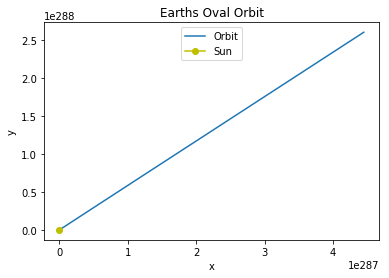

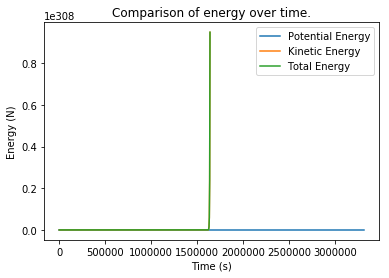

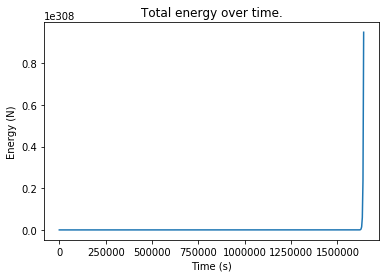

In [33]:
mEarth = 5.9722e24 #In kg
enrgy = [] #Energy
Upnts = [] #Potential Energy
Tpnts = [] #Kinetic Energy
xpnts = []
ypnts = []

#Define the acceleration function almost the same as previous function
def accel(a):
    x = r[0]
    y = r[1]
    radius = (x**2 + y**2)**(3/2)
    v_x = r[2] #Setting up derivatives in vectors
    v_y = r[3] #for x and y
    dx = v_x
    dy = v_y
    dv_x = con*x/radius
    dv_y = con*y/radius
    return np.array([dv_x,dv_y], float)

#Energy Function
def energy(r):
    U = con*mEarth/np.sqrt(r[0]**2+r[1]**2)
    T = 0.5*mEarth*(r[2]**2+r[3]**2)
    return U,T

#Initial Conditions
periDis = 1.4710e11 #Perihelion Distance in meters
periVel = 3.0287e4 #Perihelion Velocity in inverse ms
r = np.array([0,periDis,periVel,0], float)
ac = accel(r) #Acceleration

s = 31536000 #Seconds in a year
start = 0
end = 2*s #Two years
stepSize = 3600
tpoints = np.arange(start,end,stepSize)

#Initiate Verlet Algorithm
for t in tpoints:
    xpnts.append(r[0])
    ypnts.append(r[1])
    U, T = energy(r)
    Upnts.append(U)
    Tpnts.append(T)
    enrgy.append(U+T)
    
    vthalf = np.array([r[2]+ac[0]*stepSize/2]),np.array([r[3]+ac[1]*stepSize/2]) #Need to change this to be an array since there are multiple variables
    r[0] += r[0]+vthalf[0]*stepSize/2
    r[1] += r[1]+vthalf[1]*stepSize/2
    acc = accel(r[0])
    r[2] += vthalf[0] + acc[0]
    r[3] += vthalf[1] + acc[1]

    

#Plot Oval Orbit
plt.plot(xpnts,ypnts, label='Orbit')
plt.plot(-0.5e11,0,marker='o',color='y', label='Sun')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Earths Oval Orbit')
plt.legend(loc='upper center')
plt.show()

plt.plot(tpoints,Upnts, label = 'Potential Energy')
plt.plot(tpoints,Tpnts, label = 'Kinetic Energy')
plt.plot(tpoints,enrgy, label = 'Total Energy')
plt.legend()
plt.title("Comparison of energy over time.")
plt.xlabel("Time (s)")
plt.ylabel("Energy (N)")
plt.show()

plt.plot(tpoints,enrgy, label = 'Total Energy')
plt.title("Total energy over time.")
plt.xlabel("Time (s)")
plt.ylabel("Energy (N)")
plt.show()

I know this is wrong, but i cannot seem to get the Algorithm to work correctly and I am not sure why